In [19]:
import pandas as pd
import numpy as np
from google.colab import files
from catboost import CatBoostClassifier


In [2]:
upload=files.upload()

Saving glass.csv to glass.csv


In [3]:
data=pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
data['Fe'].unique()

array([0.  , 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14, 0.22, 0.06, 0.3 ,
       0.16, 0.1 , 0.09, 0.31, 0.03, 0.12, 0.32, 0.15, 0.2 , 0.34, 0.28,
       0.08, 0.29, 0.21, 0.18, 0.25, 0.35, 0.37, 0.51, 0.05, 0.01])

In [6]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

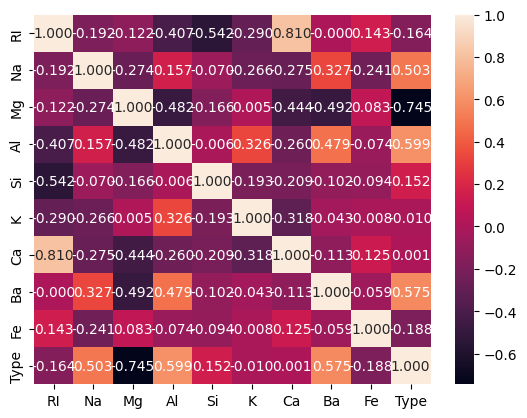

In [7]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,fmt='.3f')

In [8]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [11]:
x_train

array([[ 1.47869653, -0.26856539,  0.76092936, ...,  0.89565825,
        -0.36541712, -0.58652156],
       [ 0.35166708, -0.84217579, -0.57676783, ...,  0.9511415 ,
        -0.36541712, -0.58652156],
       [ 0.08088728, -0.49561951,  0.65642177, ...,  0.1902283 ,
        -0.36541712,  1.01053555],
       ...,
       [-0.00327401,  0.34089565, -1.86569482, ...,  1.66449763,
        -0.36541712, -0.58652156],
       [-0.53019687, -0.67487276,  0.61461873, ..., -0.71335613,
        -0.36541712, -0.58652156],
       [ 0.31507522,  0.67550171, -0.2005405 , ...,  0.53898019,
        -0.36541712, -0.58652156]])

In [12]:
x_test

array([[-0.17275268, -0.63505056,  0.65968719, -0.39959892, -0.02217211,
         0.32521616, -0.28576828, -0.30460914,  2.61842574],
       [ 1.0032351 ,  0.01277306,  0.59776652, -1.53968682, -0.67272778,
        -0.85788831,  0.49801484, -0.30460914, -0.31796694],
       [-0.64978026,  0.36485112,  0.59088644,  0.22473494, -0.15676983,
         0.37254034, -0.66450912, -0.30460914, -0.59325375],
       [-0.37172675,  0.82959416,  0.61152667, -0.07385952,  0.15729153,
        -0.00605309, -0.73289288, -0.30460914, -0.59325375],
       [-0.39723625, -0.69138305,  0.59088644, -0.10100447,  0.48256936,
         0.32521616, -0.33311088, -0.30460914, -0.59325375],
       [ 0.77620058,  1.25208783,  0.73536802, -1.29538227, -1.37936583,
        -0.59760533, -0.04379497, -0.30460914,  2.80195028],
       [-0.19826218, -0.08580879,  0.81792892,  0.06186524, -0.29136756,
         0.15958153, -0.48039899, -0.30460914,  0.32436896],
       [-0.19060933,  0.04093931,  0.43264472,  0.41474959, -0

<Axes: title={'center': 'Testing_data'}, ylabel='Type'>

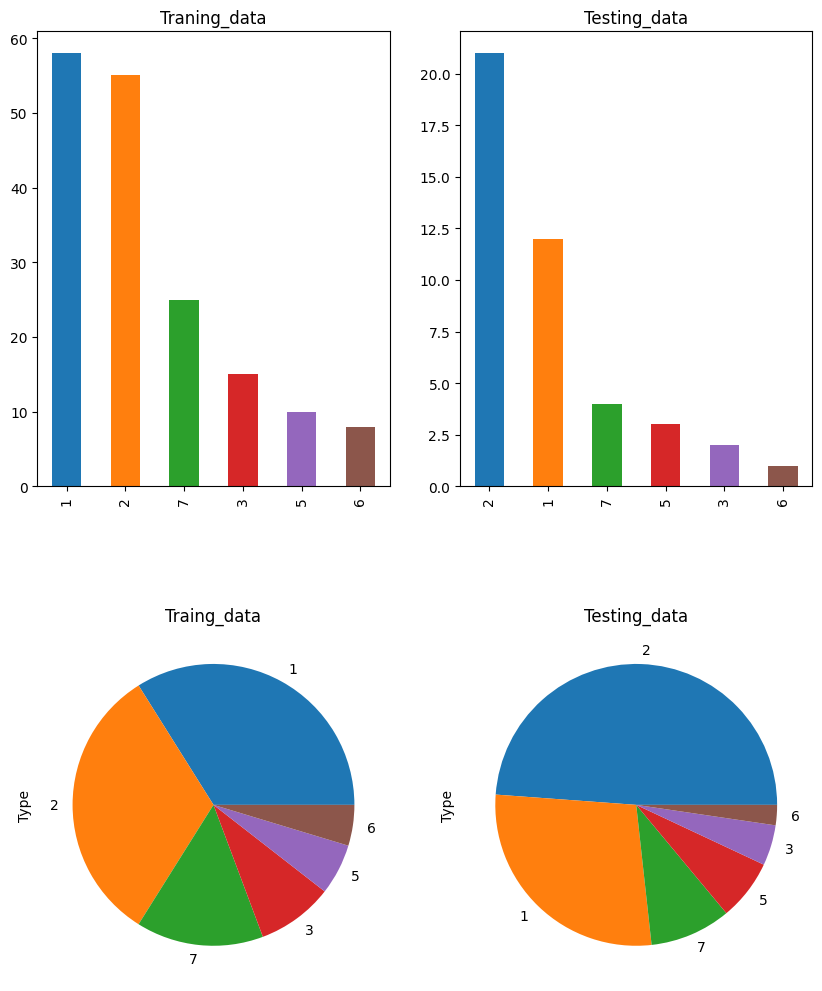

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,13))
plt.subplot(2,2,1);y_train.value_counts().plot(kind='bar',color=['C0','C1','C2','C3','C4','C5','C6'],title='Traning_data')
plt.subplot(2,2,2);y_test.value_counts().plot(kind='bar',color=['C0','C1','C2','C3','C4','C5','C6'],title='Testing_data')
plt.subplot(2,2,3);y_train.value_counts().plot(kind='pie',title='Traing_data')
plt.subplot(2,2,4);y_test.value_counts().plot(kind='pie',title='Testing_data')

In [14]:
len(x_train),len(x_test)

(171, 43)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred=knn.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrrix=confusion_matrix(y_pred,y_test)
print(confusion_matrix)
knn_scores=accuracy_score(y_pred,y_test)
knn_scores

<function confusion_matrix at 0x7c4c338d2d40>


0.7209302325581395

In [17]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


In [20]:
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
cbc_scores = [] # create an empty list to store the gbc scores
data = pd.DataFrame() # create an empty dataframe outside the loop
for i in learning_rate:
  cbc = CatBoostClassifier(n_estimators=30, learning_rate=i)
  cbc.fit(x_train, y_train)
  accuracy_score = cbc.score(x_test, y_test)
  cbc_scores.append(accuracy_score) # append the accuracy score to the list
  print(f'learning:{i}, gbc_score:{accuracy_score}') # print the results for each iteration

data['learning_rate'] = learning_rate # add the learning rate column to the dataframe
data['accuracy'] = cbc_scores # add the accuracy column to the dataframe
print(data) # print the dataframe





0:	learn: 1.7046620	total: 51.4ms	remaining: 1.49s
1:	learn: 1.5964226	total: 55.2ms	remaining: 773ms
2:	learn: 1.5301723	total: 59ms	remaining: 531ms
3:	learn: 1.4656213	total: 63.4ms	remaining: 412ms
4:	learn: 1.4153699	total: 72.8ms	remaining: 364ms
5:	learn: 1.3486633	total: 80.5ms	remaining: 322ms
6:	learn: 1.2928312	total: 84.9ms	remaining: 279ms
7:	learn: 1.2466987	total: 88.9ms	remaining: 245ms
8:	learn: 1.2066304	total: 93ms	remaining: 217ms
9:	learn: 1.1679598	total: 97ms	remaining: 194ms
10:	learn: 1.1386243	total: 101ms	remaining: 174ms
11:	learn: 1.1032832	total: 105ms	remaining: 158ms
12:	learn: 1.0678387	total: 112ms	remaining: 147ms
13:	learn: 1.0351662	total: 116ms	remaining: 133ms
14:	learn: 1.0122077	total: 120ms	remaining: 120ms
15:	learn: 0.9861308	total: 124ms	remaining: 109ms
16:	learn: 0.9642327	total: 128ms	remaining: 98ms
17:	learn: 0.9392837	total: 132ms	remaining: 88.1ms
18:	learn: 0.9203051	total: 136ms	remaining: 78.7ms
19:	learn: 0.8954894	total: 140ms	re

In [21]:
from catboost import CatBoostClassifier
cbc=CatBoostClassifier(n_estimators=30,learning_rate=0.8)
cbc.fit(x_train,y_train)
cbc_score=cbc.score(x_test,y_test)
cbc_score*100

0:	learn: 1.2419379	total: 9.5ms	remaining: 275ms
1:	learn: 1.0278289	total: 23.1ms	remaining: 323ms
2:	learn: 0.8449953	total: 29.8ms	remaining: 268ms
3:	learn: 0.7309446	total: 33.6ms	remaining: 218ms
4:	learn: 0.6826658	total: 38.5ms	remaining: 193ms
5:	learn: 0.5796165	total: 43.2ms	remaining: 173ms
6:	learn: 0.4988237	total: 47.3ms	remaining: 156ms
7:	learn: 0.4562964	total: 52.3ms	remaining: 144ms
8:	learn: 0.4299963	total: 56.9ms	remaining: 133ms
9:	learn: 0.3834158	total: 61.2ms	remaining: 122ms
10:	learn: 0.3541527	total: 65.4ms	remaining: 113ms
11:	learn: 0.3300392	total: 71.2ms	remaining: 107ms
12:	learn: 0.3099351	total: 76.3ms	remaining: 99.7ms
13:	learn: 0.2863644	total: 80.6ms	remaining: 92.2ms
14:	learn: 0.2596298	total: 85.7ms	remaining: 85.7ms
15:	learn: 0.2462520	total: 90.5ms	remaining: 79.2ms
16:	learn: 0.2308909	total: 94.9ms	remaining: 72.6ms
17:	learn: 0.2176563	total: 100ms	remaining: 67ms
18:	learn: 0.1991254	total: 105ms	remaining: 61ms
19:	learn: 0.1936333	t

81.3953488372093

from this we can understand that at learning_rate=0.5 model is getting high accuracy

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
gbc_scores = []
data = pd.DataFrame()
for i in learning_rate:
  gbc = GradientBoostingClassifier(n_estimators=30, learning_rate=i)
  gbc.fit(x_train, y_train)
  accuracy_score = gbc.score(x_test, y_test)
  gbc_scores.append(accuracy_score)
  print(f'learning:{i}, gbc_score:{accuracy_score}')

data['learning_rate'] = learning_rate
data['accuracy'] = gbc_scores
print(data)






learning:0.1, gbc_score:0.6511627906976745
learning:0.2, gbc_score:0.6511627906976745
learning:0.3, gbc_score:0.627906976744186
learning:0.4, gbc_score:0.6511627906976745
learning:0.5, gbc_score:0.6511627906976745
learning:0.6, gbc_score:0.5813953488372093
learning:0.7, gbc_score:0.6744186046511628
learning:0.8, gbc_score:0.6511627906976745
learning:0.9, gbc_score:0.6511627906976745
learning:1.0, gbc_score:0.6046511627906976
   learning_rate  accuracy
0            0.1  0.651163
1            0.2  0.651163
2            0.3  0.627907
3            0.4  0.651163
4            0.5  0.651163
5            0.6  0.581395
6            0.7  0.674419
7            0.8  0.651163
8            0.9  0.651163
9            1.0  0.604651


from this we can see that learning_rate=0.3,0.6,0.8 will give the same accuracy

In [23]:
gbc=GradientBoostingClassifier(n_estimators=30,learning_rate=0.8)
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_test,y_test)
gbc_score


0.6511627906976745

In [24]:
import plotly.express as px
x=['CatBoostClassifier','KNN','GradientBoostingClassifier']
y=[cbc_score,knn_scores,gbc_score]
fig=px.bar(x=x,y=y,color=x,title='Model_Names-Models_Scores',labels={'x':'Models','y':'Models_scores'})
fig.show()